## Rounter Graphs

In [16]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [17]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    number3: int
    number4: int
    operation2: str
    finalNumber: int
    finalNumber2: int

In [18]:
def adder(state: AgentState) -> AgentState:
    """ This node adds the 2 numbers"""
    state['finalNumber'] += state['number1'] + state['number2']
    return state

def substractor(state:AgentState) -> AgentState:
    """ This node substracts 2 numbers """
    state['finalNumber'] += state['number1'] - state['number2']
    return state

def decide_next_node(state:AgentState) -> AgentState:
    if state['operation'] == "+":
        return "addition_operation"
    elif state['operation'] == "-":
        return "substraction_operation"
    
def adder2(state: AgentState) -> AgentState:
    """ This node adds the 2 numbers"""
    state['finalNumber2'] += state['number3'] + state['number4']
    return state

def substractor2(state:AgentState) -> AgentState:
    """ This node substracts 2 numbers """
    state['finalNumber2'] += state['number3'] - state['number4']
    return state

def decide_next_node2(state:AgentState) -> AgentState:
    if state['operation2'] == "+":
        return "addition_operation2"
    elif state['operation2'] == "-":
        return "substraction_operation2"

In [19]:
graph = StateGraph(AgentState)

graph.add_node('add_node', adder)
graph.add_node('substract_node', substractor)
graph.add_node('router', lambda state:state)

graph.add_node('add_node2', adder2)
graph.add_node('substract_node2', substractor2)
graph.add_node('router2', lambda state:state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node, 
    {
        "addition_operation": "add_node",
        "substraction_operation": "substract_node"}
    )

graph.add_edge("add_node", "router2")
graph.add_edge("substract_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2": "add_node2",
        "substraction_operation2": "substract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("substract_node2", END)

app = graph.compile()

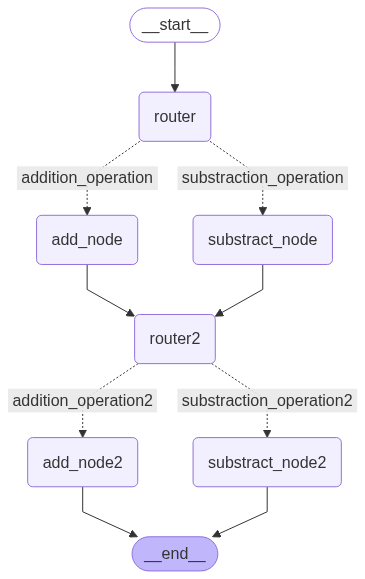

In [20]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
initial_state = AgentState(number1 = 10, operation="-", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)
print(app.invoke(initial_state))


{'number1': 10, 'number2': 5, 'operation': '-', 'number3': 7, 'number4': 2, 'operation2': '+', 'finalNumber': 5, 'finalNumber2': 9}
